In [1]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Simulação de dados de entrada (substitua isso pelos seus dados reais)
np.random.seed(42)
X = np.random.rand(100, 5)  # Exemplo de 100 instâncias com 5 atributos

# Substitua 'comprimento_entrada' pelo comprimento dos seus dados de entrada
comprimento_entrada = X.shape[1]

# Função para inicializar o SOM com os parâmetros dados
def inicializar_SOM(sigma, taxa_aprendizado, num_iteracoes):
    som = MiniSom(x=10, y=10, input_len=comprimento_entrada, sigma=sigma, learning_rate=taxa_aprendizado)
    som.random_weights_init(X)
    som.train_random(X, num_iteracoes)
    return som

melhores_outliers = []
melhores_parametros = {'sigma': None, 'taxa_aprendizado': None, 'num_iteracoes': None} # saida magica ppara usarmos
melhor_media_distancia = float('inf')

# Valores para sigma, taxa de aprendizado e número de iterações
valores_sigma = [0.1, 0.5, 1.0, 0.01, 0.001]  # sigma
valores_taxa_aprendizado = [0.1, 0.5, 1.0, 0.01, 0.001]  # LR aprendizado
valores_num_iteracoes = [100, 500, 1000, 2000, 5000, 6000]  # iterações

# Teste diferentes combinações de parâmetros
for valor_sigma in valores_sigma:
    for valor_taxa_aprendizado in valores_taxa_aprendizado:
        for valor_num_iteracoes in valores_num_iteracoes:
            # Inicialize o SOM com os parâmetros atuais
            som = inicializar_SOM(valor_sigma, valor_taxa_aprendizado, valor_num_iteracoes)

            # Realize o mapeamento e identificação dos outliers
            mapeado = defaultdict(list)
            for i, x in enumerate(X):
                mapeado[som.winner(x)].append((i, som.distance_map()[som.winner(x)]))

            # Encontrar os neurônios com maior distância euclidiana média
            outliers = []
            for posicao in mapeado:
                distancias = [d[1] for d in mapeado[posicao]]
                media_distancia = np.mean(distancias)
                if media_distancia > np.mean(som.distance_map()):
                    outliers.extend([x[0] for x in mapeado[posicao]])

            # Verifique se a média de distância é melhor do que a melhor média atual
            media_distancia_atual = np.mean([d[1] for d in mapeado[posicao] for posicao in mapeado])
            if media_distancia_atual < melhor_media_distancia:
                melhor_media_distancia = media_distancia_atual
                melhores_outliers = outliers
                melhores_parametros['sigma'] = valor_sigma
                melhores_parametros['taxa_aprendizado'] = valor_taxa_aprendizado
                melhores_parametros['num_iteracoes'] = valor_num_iteracoes

print(f"Melhores parâmetros: {melhores_parametros}")
print(f"Índices dos outliers com os melhores parâmetros: {melhores_outliers[:2]}")


Melhores parâmetros: {'sigma': 0.01, 'taxa_aprendizado': 0.5, 'num_iteracoes': 100}
Índices dos outliers com os melhores parâmetros: [0, 51]


In [3]:
# Carregar os dados do arquivo CSV


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
dados = pd.read_csv(url, header=None)

# Separar os atributos (features) e as classes
X = dados.iloc[:, 2:].values
y = dados.iloc[:, 1].values

# Converter classes para valores numéricos
mapeamento_classes = {'M': 1, 'B': 0}
y = np.array([mapeamento_classes[cl] for cl in y])

# Normalizar os dados
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [4]:
# Definir os parâmetros da SOM (Aplicando os valores vistos anteriormente)

som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=0.5, learning_rate=0.01)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=2000)

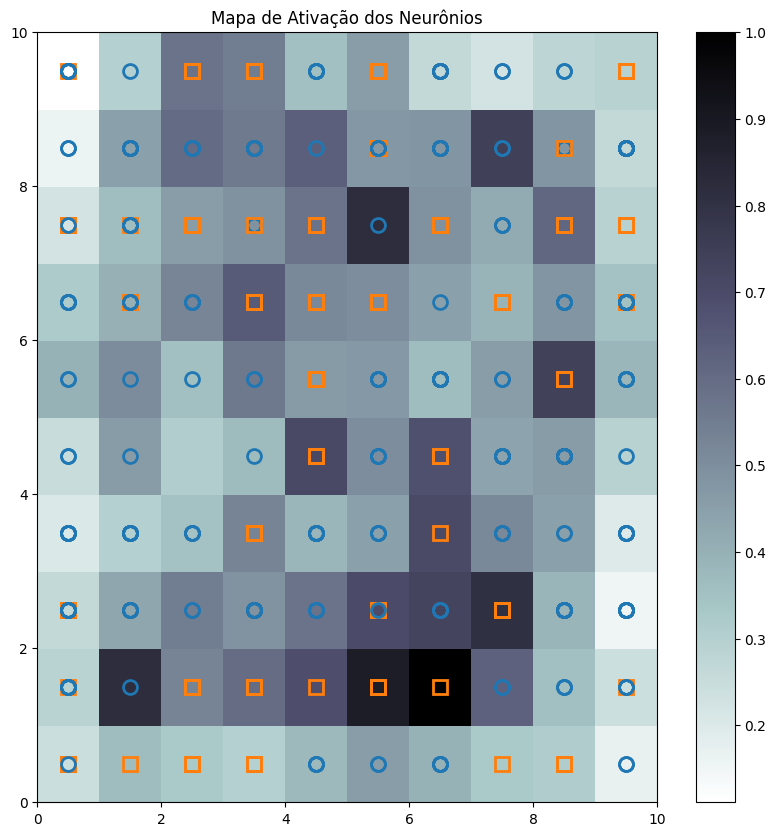

Índices dos outliers: [0, 42]


In [5]:
# Visualizar o mapa de ativação dos neurônios
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # mapa de distâncias
plt.colorbar()

# Adicionar marcadores para as classes
marcadores = ['o', 's']  # 'o' para benigno (0), 's' para maligno (1)
cores = ['C0', 'C1']  # azul para benigno, laranja para maligno

for i, x in enumerate(X):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, marcadores[y[i]], markerfacecolor='None',
             markeredgecolor=cores[y[i]], markersize=10, markeredgewidth=2)

plt.title('Mapa de Ativação dos Neurônios')
plt.show()

# Identificar os outliers
mapa = defaultdict(list)
for i, x in enumerate(X):
    mapa[som.winner(x)].append((i, som.distance_map()[som.winner(x)]))

outliers = []
for posicao in mapa:
    distances = [d[1] for d in mapa[posicao]]
    mean_distance = np.mean(distances)
    if mean_distance > np.mean(som.distance_map()):
        outliers.extend([x[0] for x in mapa[posicao]])

print(f"Índices dos outliers: {outliers[:2]}")